<img scr = 'datalogo.png'>

#  Teste de estacionariedade com Python
<br>
Ao trabalhar com dados de séries temporais é preciso distinguir se tal conjunto de dados é estacionário ou não. Quando trabalhamos com dados não estacionários, de acordo com Bueno (2008), é impossível realizar inferência estatística. Ao estimar um modelo com observações não estacionárias, mesmo que obtenha-se números altos no R², os resultados não irão ter sentido, trata-se de uma regressão espúria. Para evitar tal problema é necessário passar a base de dados por alguns testes e, após isso, estimar seu modelo. No presente notebook será apresentado o testes de Dickey-Fuller Aumentado.

- Teste ADF 
- Testes com tendência

## Importando e limpando os dados

In [1]:
#bibliotecas utilizadas
import pandas as pd #dataframes e tratamento
import matplotlib.pyplot as plt #visualização de dados
import seaborn as sns #visualização de dados
from statsmodels.tsa.stattools import adfuller #teste Dickey-Fyller aumentado
from dateutil.relativedelta import relativedelta #para arrumar as datas da base de dados
import datetime #para arrumar as datas da base de dados

In [2]:
df = pd.read_csv('dados2.csv', sep = ';')

In [3]:
df

,Data,Taxa de câmbio,Taxa Selic,varIPCA
0,fev/99,"2,064","2,38","1,044640018"
1,mar/99,"1,7212","3,33","1,093852018"
2,abr/99,"1,6599","2,35","0,558382147"
3,mai/99,"1,7232","2,02","0,299838391"
4,jun/99,"1,7687","1,67","0,189499665"
...,...,...,...,...
270,ago/21,"5,1427","0,43","0,866225072"
271,set/21,"5,4388","0,44","1,153286907"
272,out/21,"5,6424","0,49","1,242208384"
273,nov/21,"5,6193","0,59","0,945584264"


In [4]:
#formato datetime no dataframe
inicio_date = datetime.date(1999, 1, 1)
fim_date = datetime.date(2021, 12, 1)
delta = relativedelta(months=1)
datas = []
while (inicio_date <= fim_date):
    datas.append(inicio_date)
    inicio_date += delta
for registro in range(len(df)):
    df.loc[registro, 'datetime'] = datas[registro]

df = df.set_index('datetime')
df1 = df.drop(columns=['Data'])

In [5]:
df1

,Taxa de câmbio,Taxa Selic,varIPCA
datetime,,,
1999-01-01,"2,064","2,38","1,044640018"
1999-02-01,"1,7212","3,33","1,093852018"
1999-03-01,"1,6599","2,35","0,558382147"
1999-04-01,"1,7232","2,02","0,299838391"
1999-05-01,"1,7687","1,67","0,189499665"
...,...,...,...
2021-07-01,"5,1427","0,43","0,866225072"
2021-08-01,"5,4388","0,44","1,153286907"
2021-09-01,"5,6424","0,49","1,242208384"


In [6]:
#Limpando os dados: vírgulas e pontos
df1['varIPCA'] = df1['varIPCA'].str.replace(',', '.').astype(float)
df1['Taxa de câmbio'] = df1['Taxa de câmbio'].str.replace(',', '.').astype(float)
df1['Taxa Selic'] = df1['Taxa Selic'].str.replace(',', '.').astype(float)

In [7]:
df1

,Taxa de câmbio,Taxa Selic,varIPCA
datetime,,,
1999-01-01,2.0640,2.38,1.044640
1999-02-01,1.7212,3.33,1.093852
1999-03-01,1.6599,2.35,0.558382
1999-04-01,1.7232,2.02,0.299838
1999-05-01,1.7687,1.67,0.189500
...,...,...,...
2021-07-01,5.1427,0.43,0.866225
2021-08-01,5.4388,0.44,1.153287
2021-09-01,5.6424,0.49,1.242208


## Visualização
<br>
É possível ter uma noção do comportamento da série por sua visualização, séries estacionárias flutuam em torno de uma
tendência determinística, sem jamais se distanciar de tal tendência, de acordo com Bueno (2008). 
<br>
Abaixo temos 2 exemplos, o primeiro de uma série não estacionária e o segundo de uma estacionária.

<img src = 'importacao.png'>

<img src = 'naoestac.png'>

<img src = 'sérieestacionaria.png'>

<br>
Agora vamos visualizar o nosso conjunto de dados:

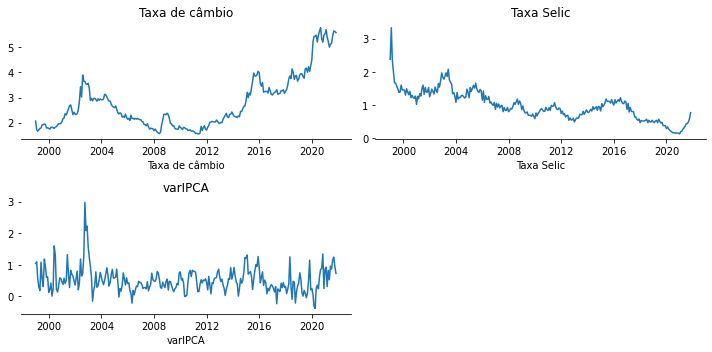

In [8]:
tickers = df1.columns
a = 2
b = 2
c = 1
fig = plt.figure(figsize=(10,5))
for i in tickers:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    plt.plot(df1[i])
    c = c + 1

plt.tight_layout()
sns.despine(left = True)
plt.show()

<br>
Pela visualização podemos suspeitar que as séries da taxa de câmbio e Selic são não estacionárias, agora vamos obter a confirmação por meio dos testes.

## Teste Dickey-Fuller aumentado
<br> 
Teste utilizado para verificar a existência de raiz unitária na série, quando uma série possui raiz unitária ela é dita não estacionária.
<br>
Hipótese nula: a série possui raiz unitária, ou seja, não estacionária.
<br>
Hipótese alternativa: série estacionária
<br>
Adota-se aqui 5% de significância para a análise.
<br>

In [9]:
#O teste de Dickey-Fuller aumentado é realizado segundo a seguinte função:
adfuller(df1['varIPCA'])
#Ele retorna uma tuple onde o primeiro valor é a estatística teste da função e o segundo é o p-valor. 

(-3.69924519628502,
 0.004123783663812614,
 8,
 266,
 {'1%': -3.455175292841607,
  '5%': -2.8724677563219485,
  '10%': -2.57259315846006},
 114.67153248212679)

<br>
Entretanto, caso sua base de dados seja extensa é possível automatizar esse processo com um loop:

In [10]:
#cria-se 3 listas, a primeira com o nome das colunas do data frame, a segunda uma lista vazia onde serão adicionados
#os p-valores e a terceira é uma lista vazia onde serão adicionados as estatísticas testes
colunas = df1.columns.tolist()
pvaloresadf = []
estatadf = []
#utiliza-se os 2 for loops seguintes para fazer o teste para cada coluna do data frame, o primeiro adiciona os p-valores na lista
# 'pvaloresadf' e o segundo adiciona as estatísticas na lista 'estatadf'
for i in range(len(colunas)):
    pvaloresadf.append(adfuller(df1[colunas[i]], regression='c',)[1])
for i in range(len(colunas)):
    estatadf.append(adfuller(df1[colunas[i]], regression='c',)[0])
#criando uma tuple com os valores das 3 listas para criar um dataframe
adf_tuples = list(zip(colunas, pvaloresadf, estatadf))
adfullerteste = pd.DataFrame(adf_tuples, columns=['Série', 'p-valor', 'Estatística teste'])
#esse for loop vai nos retornar se rejeitamos ou não a hipótese nula de acordo com 5% de significância
for i in range(len(adfullerteste['p-valor'])):
    if adfullerteste.loc[i, 'p-valor']>0.05:
        adfullerteste.loc[i, 'resultado'] = 'aceita-se H0 a 5%'
    else: 
        adfullerteste.loc[i, 'resultado'] = 'rejeita-se'
adfullerteste = adfullerteste.set_index('Série')

In [11]:
adfullerteste

,p-valor,Estatística teste,resultado
Série,,,
Taxa de câmbio,0.972201,0.198925,aceita-se H0 a 5%
Taxa Selic,0.125109,-2.461562,aceita-se H0 a 5%
varIPCA,0.004124,-3.699245,rejeita-se


<br> Percebe-se que o teste confirma as suspeitas que tivemos com a observação nos gráficos. <br>
<br> Dessa forma, a taxa de câmbio obteve um p-valor de 0,972201 e a Selic de 0,125, considerando um nível de significância de 5% nós aceitamos a hipótese nula de não estacionariedade. Por outro lado, a variação do IPCA (varIPCA) obteve um p-valor próximo a zero, portanto rejeitamos a hipótese nula, há indícios de que tal série é estacionária.